In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read CSV
got_data = pd.read_csv("Resources/got.csv")
got_data

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [4]:
# Get attacker and defender king data
attacker_data = got_data["attacker_king"].value_counts()
defender_data = got_data["defender_king"].value_counts()

In [5]:
# Get total battle data
# battle_data = attacker_data.add(defender_data, fill_value=0)
battle_data = pd.DataFrame({'attacker': attacker_data, 'defender': defender_data})

In [22]:
# Configure plot and ticks
battle_data['attacker'] = battle_data['attacker'].fillna(0).astype(int)
battle_data['battles'] = battle_data['attacker'].astype(int)+battle_data['defender']
battle_data.sort_values('battles', ascending=False, inplace=True)
df2plot = battle_data[['attacker', 'defender']]
df2plot

,attacker,defender
Joffrey/Tommen Baratheon,14,13
Robb Stark,10,14
Balon/Euron Greyjoy,7,4
Stannis Baratheon,5,2
Mance Rayder,0,1
Renly Baratheon,0,1


<IPython.core.display.Javascript object>


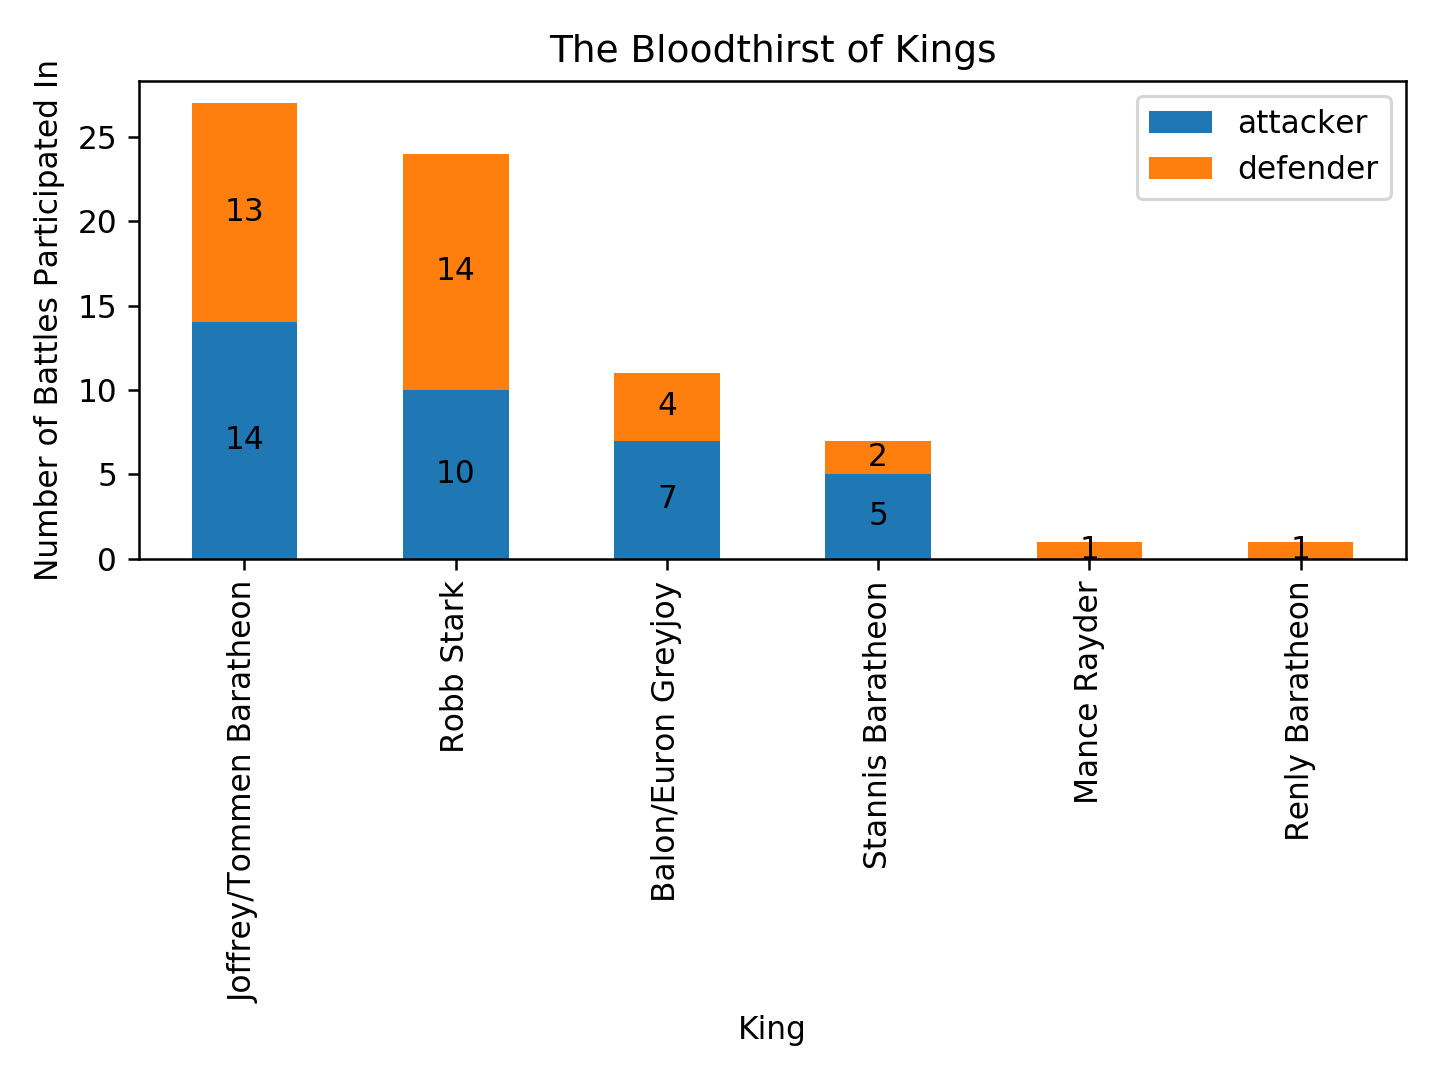

Text(0.5, 0, 'King')

In [26]:
# Set textual properties

ax=df2plot.plot(kind="bar", stacked=True)
plt.title("The Bloodthirst of Kings")
plt.ylabel("Number of Battles Participated In")
plt.xlabel("King")

In [27]:
label_list = (df2plot['attacker'].tolist() + df2plot['defender'].tolist())
for rect, value in zip(ax.patches, label_list):
    if value > 0:
        h = rect.get_height() /2.
        w = rect.get_width() /2.
        x, y = rect.get_xy()
        ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center')


In [28]:
# Resize plot to display labels
plt.tight_layout()